In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score, mean_squared_error


In [3]:
# Loading the dataset
df = pd.read_csv("C:/Users/91807/Downloads/df_Clean.csv")


In [4]:
# Checking the shape of the dataset
print(f"Dataset shape: {df.shape}")

Dataset shape: (358, 21)


In [5]:
# Drop index column
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Checking for null/missing values
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
Region              0
State               0
Area                0
City                0
Consumer_profile    0
Product_category    0
Product_type        0
AC_1001_Issue       0
AC_1002_Issue       0
AC_1003_Issue       0
TV_2001_Issue       0
TV_2002_Issue       0
TV_2003_Issue       0
Claim_Value         0
Service_Centre      0
Product_Age         0
Purchased_from      0
Call_details        0
Purpose             0
Fraud               0
dtype: int64


In [7]:
# Checking for duplicate values
print(f"Duplicate values: {df.duplicated().sum()}")


Duplicate values: 0


In [8]:

# Checking the data types
print(f"Data types:\n{df.dtypes}")

Data types:
Region               object
State                object
Area                 object
City                 object
Consumer_profile     object
Product_category     object
Product_type         object
AC_1001_Issue         int64
AC_1002_Issue         int64
AC_1003_Issue         int64
TV_2001_Issue         int64
TV_2002_Issue         int64
TV_2003_Issue         int64
Claim_Value         float64
Service_Centre        int64
Product_Age           int64
Purchased_from       object
Call_details        float64
Purpose              object
Fraud                 int64
dtype: object


In [9]:
# Unique values in each column
print(f"Unique values:\n{df.nunique()}")

Unique values:
Region                8
State                20
Area                  2
City                 27
Consumer_profile      2
Product_category      2
Product_type          2
AC_1001_Issue         3
AC_1002_Issue         3
AC_1003_Issue         3
TV_2001_Issue         3
TV_2002_Issue         3
TV_2003_Issue         3
Claim_Value         107
Service_Centre        7
Product_Age         188
Purchased_from        3
Call_details         37
Purpose               3
Fraud                 2
dtype: int64


In [10]:
# Renaming the values in product issue columns
issue_mapping = {0: 'No Issue', 1: 'repair', 2: 'replacement'}
for col in ['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']:
    df[col] = df[col].map(issue_mapping)


In [11]:
# Displaying basic statistics
print(df.describe())

        Claim_Value  Service_Centre  Product_Age  Call_details       Fraud
count    358.000000      358.000000   358.000000    358.000000  358.000000
mean   11994.534916       12.812849   201.843575     11.931844    0.097765
std    12063.213579        1.766844   259.731564     11.559474    0.297413
min        0.000000       10.000000     3.000000      0.500000    0.000000
25%     4006.000000       12.000000    14.000000      1.600000    0.000000
50%     7194.000000       13.000000    60.000000      6.500000    0.000000
75%    15000.000000       15.000000   303.750000     23.000000    0.000000
max    50000.000000       16.000000   991.000000     30.000000    1.000000


In [12]:
# Displaying the first few rows
print(df.head())


       Region       State   Area        City Consumer_profile  \
0       South   Karnataka  Urban   Bangalore         Business   
1       South   Karnataka  Rural   Bangalore         Business   
2       North     Haryana  Urban  Chandigarh         Personal   
3       South  Tamil Nadu  Urban     Chennai         Business   
4  North East   Jharkhand  Rural      Ranchi         Personal   

  Product_category Product_type AC_1001_Issue AC_1002_Issue AC_1003_Issue  \
0    Entertainment           TV      No Issue      No Issue      No Issue   
1        Household           AC        repair        repair      No Issue   
2        Household           AC      No Issue        repair   replacement   
3    Entertainment           TV      No Issue      No Issue      No Issue   
4    Entertainment           TV      No Issue      No Issue      No Issue   

  TV_2001_Issue TV_2002_Issue TV_2003_Issue  Claim_Value  Service_Centre  \
0        repair   replacement      No Issue      15000.0              

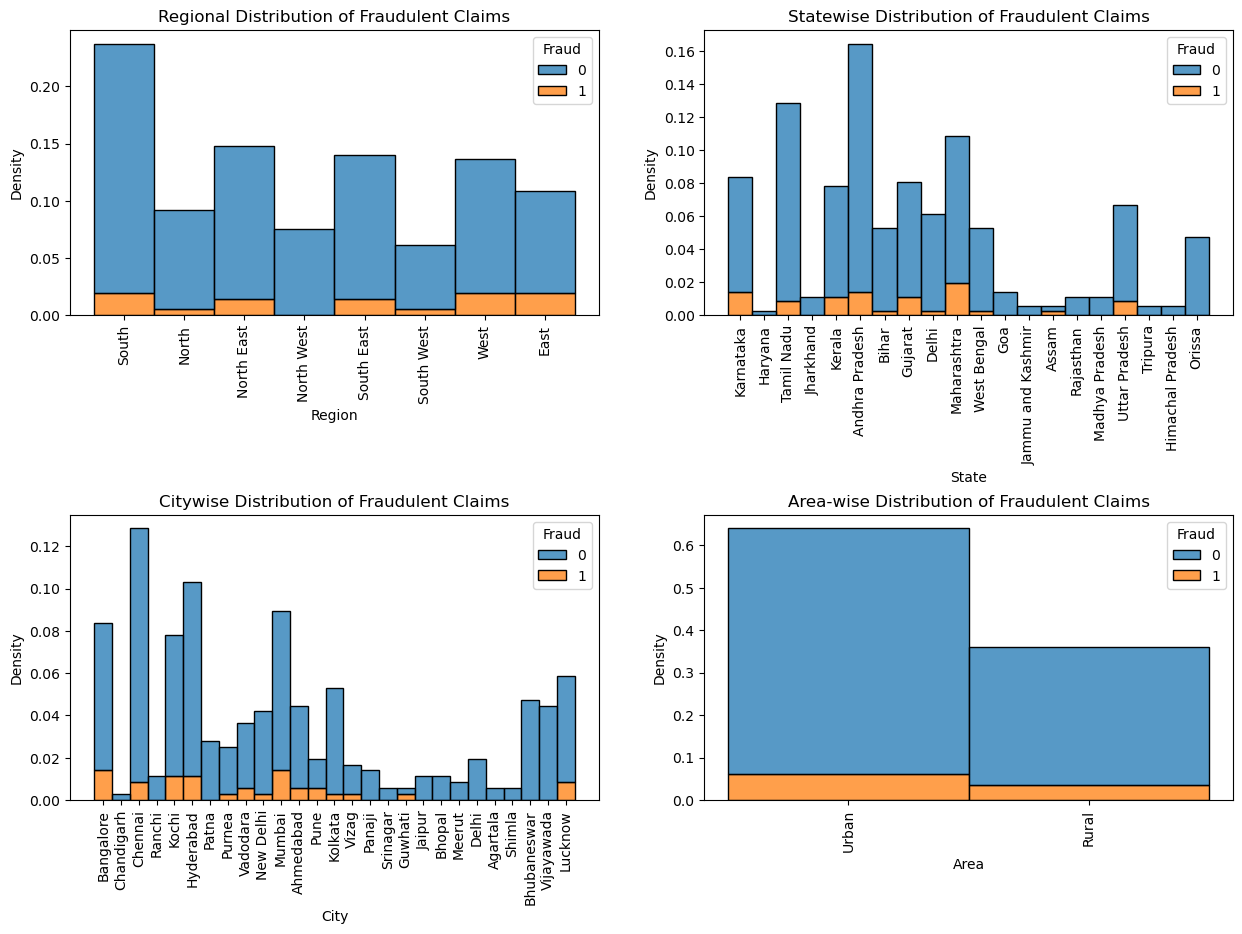

In [13]:
# Plotting distributions
fig, ax = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.7)

sns.histplot(x='Region', data=df, ax=ax[0, 0], hue='Fraud', element='bars', fill=True, stat='density', multiple='stack').set(title='Regional Distribution of Fraudulent Claims')
ax[0, 0].xaxis.set_tick_params(rotation=90)

sns.histplot(x='State', data=df, ax=ax[0, 1], hue='Fraud', element='bars', fill=True, stat='density', multiple='stack').set(title='Statewise Distribution of Fraudulent Claims')
ax[0, 1].xaxis.set_tick_params(rotation=90)

sns.histplot(x='City', data=df, ax=ax[1, 0], hue='Fraud', element='bars', fill=True, stat='density', multiple='stack').set(title='Citywise Distribution of Fraudulent Claims')
ax[1, 0].xaxis.set_tick_params(rotation=90)

sns.histplot(x='Area', data=df, ax=ax[1, 1], hue='Fraud', element='bars', fill=True, stat='density', multiple='stack').set(title='Area-wise Distribution of Fraudulent Claims')
ax[1, 1].xaxis.set_tick_params(rotation=90)

plt.show()

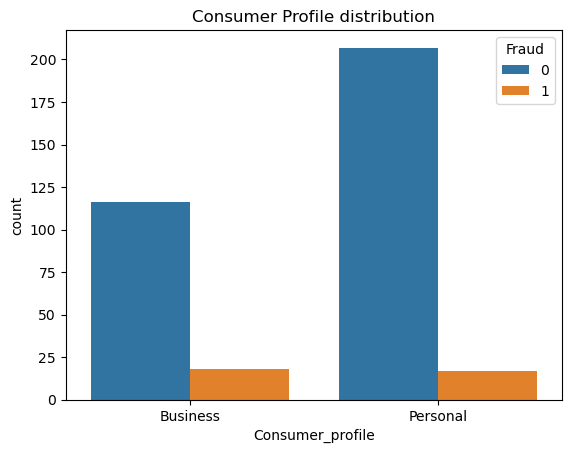

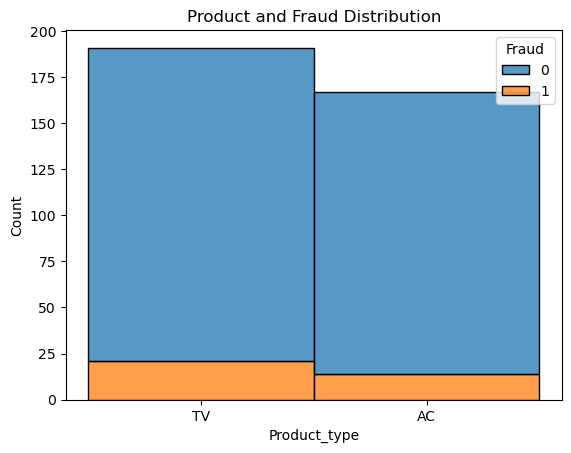

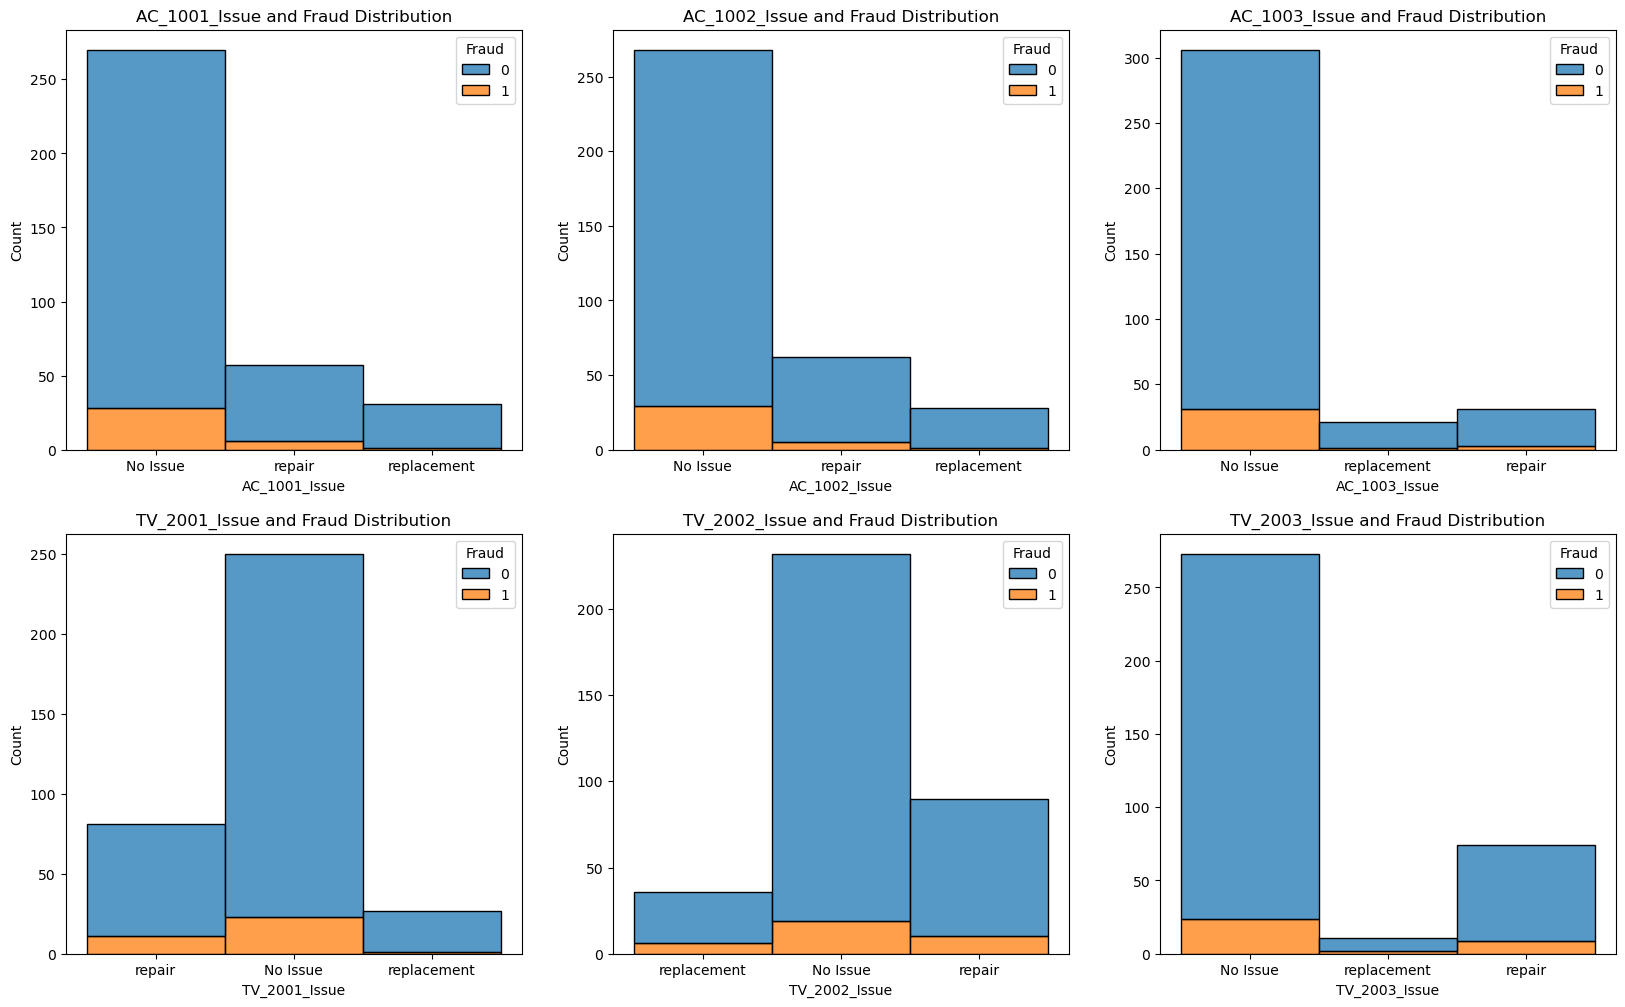

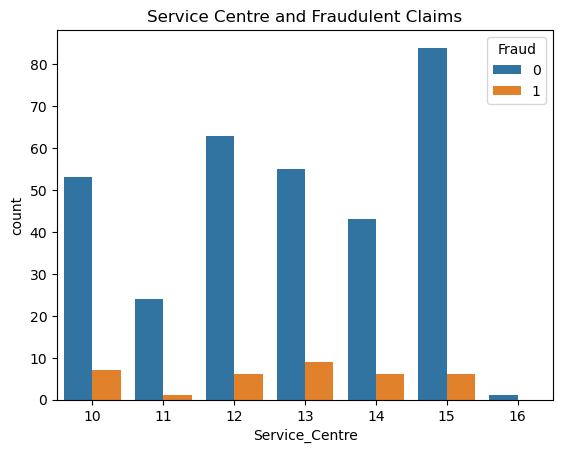

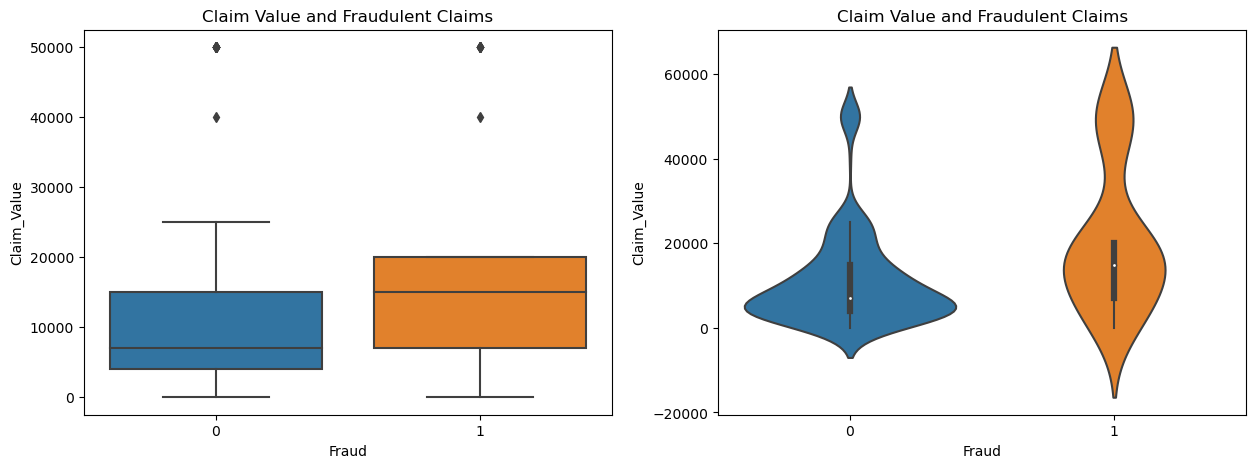

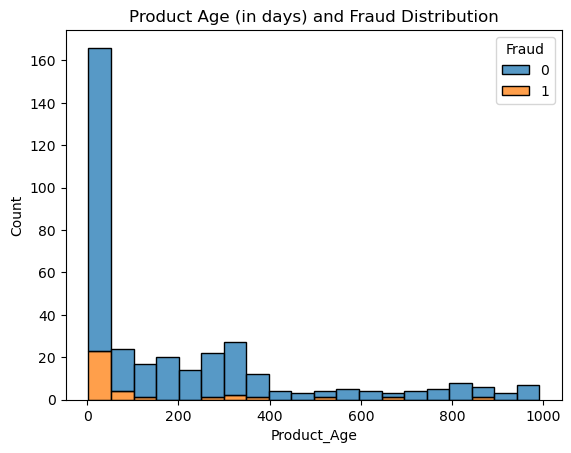

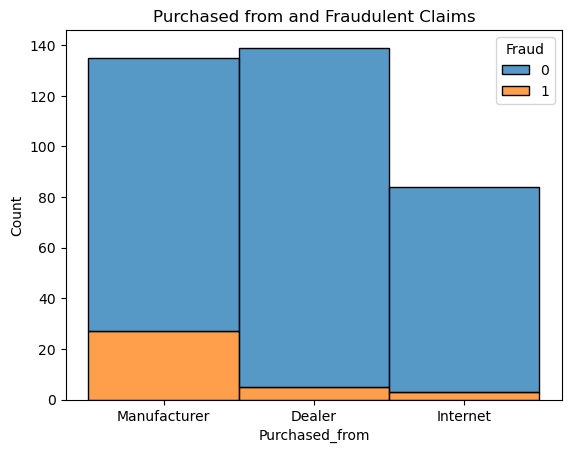

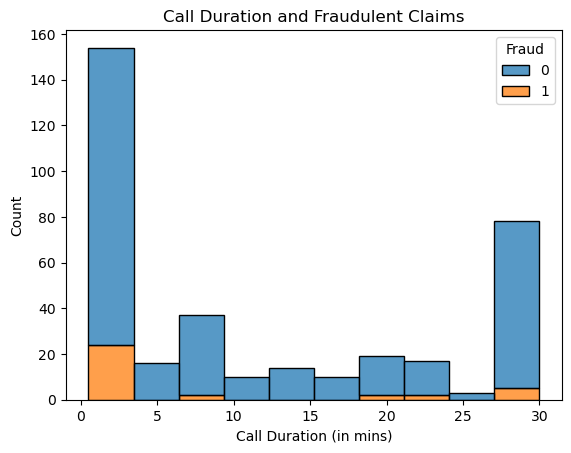

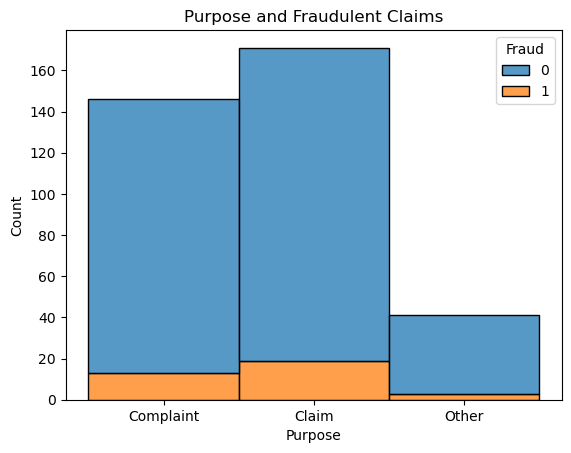

In [14]:
# Additional plots
sns.countplot(x='Consumer_profile', data=df, hue='Fraud').set_title('Consumer Profile distribution')
plt.show()

sns.histplot(x='Product_type', data=df, hue='Fraud', multiple='stack').set_title('Product and Fraud Distribution')
plt.show()

fig, ax = plt.subplots(2, 3, figsize=(20, 12))
issue_columns = ['AC_1001_Issue', 'AC_1002_Issue', 'AC_1003_Issue', 'TV_2001_Issue', 'TV_2002_Issue', 'TV_2003_Issue']
for i, col in enumerate(issue_columns):
    sns.histplot(x=col, data=df, ax=ax[i // 3, i % 3], hue='Fraud', multiple='stack').set(title=f'{col} and Fraud Distribution')
plt.show()

sns.countplot(x='Service_Centre', data=df, hue='Fraud').set_title('Service Centre and Fraudulent Claims')
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(x='Fraud', y='Claim_Value', data=df, ax=ax[0]).set_title('Claim Value and Fraudulent Claims')
sns.violinplot(x='Fraud', y='Claim_Value', data=df, ax=ax[1]).set_title('Claim Value and Fraudulent Claims')
plt.show()

sns.histplot(x='Product_Age', data=df, hue='Fraud', multiple='stack', bins=20).set_title('Product Age (in days) and Fraud Distribution')
plt.show()

sns.histplot(x='Purchased_from', data=df, hue='Fraud', multiple='stack').set_title('Purchased from and Fraudulent Claims')
plt.show()

sns.histplot(x='Call_details', data=df, hue='Fraud', multiple='stack').set_title('Call Duration and Fraudulent Claims')
plt.xlabel('Call Duration (in mins)')
plt.show()

sns.histplot(x='Purpose', data=df, hue='Fraud', multiple='stack').set_title('Purpose and Fraudulent Claims')
plt.show()

In [15]:
# Removing outliers from Claim Value column using IQR method
Q1 = df['Claim_Value'].quantile(0.25)
Q3 = df['Claim_Value'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['Claim_Value'] < (Q1 - 1.5 * IQR)) | (df['Claim_Value'] > (Q3 + 1.5 * IQR)))]

In [16]:
# Label encoding categorical columns
le = LabelEncoder()
cols = df.select_dtypes(include=['object']).columns
for col in cols:
    df[col] = le.fit_transform(df[col])
    print(f"{col}: {df[col].unique()}")


Region: [4 1 2 3 5 6 7 0]
State: [10  6 16  9 11  0  2  5  3 13 19  4  8  1 15 12 18 17  7 14]
Area: [1 0]
City: [ 2  5  6 21 11  9 18 20 24 16 15  1 19 12 26 17 23  8 10  3 14  7  0 22
  4 25 13]
Consumer_profile: [0 1]
Product_category: [0 1]
Product_type: [1 0]
AC_1001_Issue: [0 1 2]
AC_1002_Issue: [0 1 2]
AC_1003_Issue: [0 2 1]
TV_2001_Issue: [1 0 2]
TV_2002_Issue: [2 0 1]
TV_2003_Issue: [0 2 1]
Purchased_from: [2 0 1]
Purpose: [1 0 2]


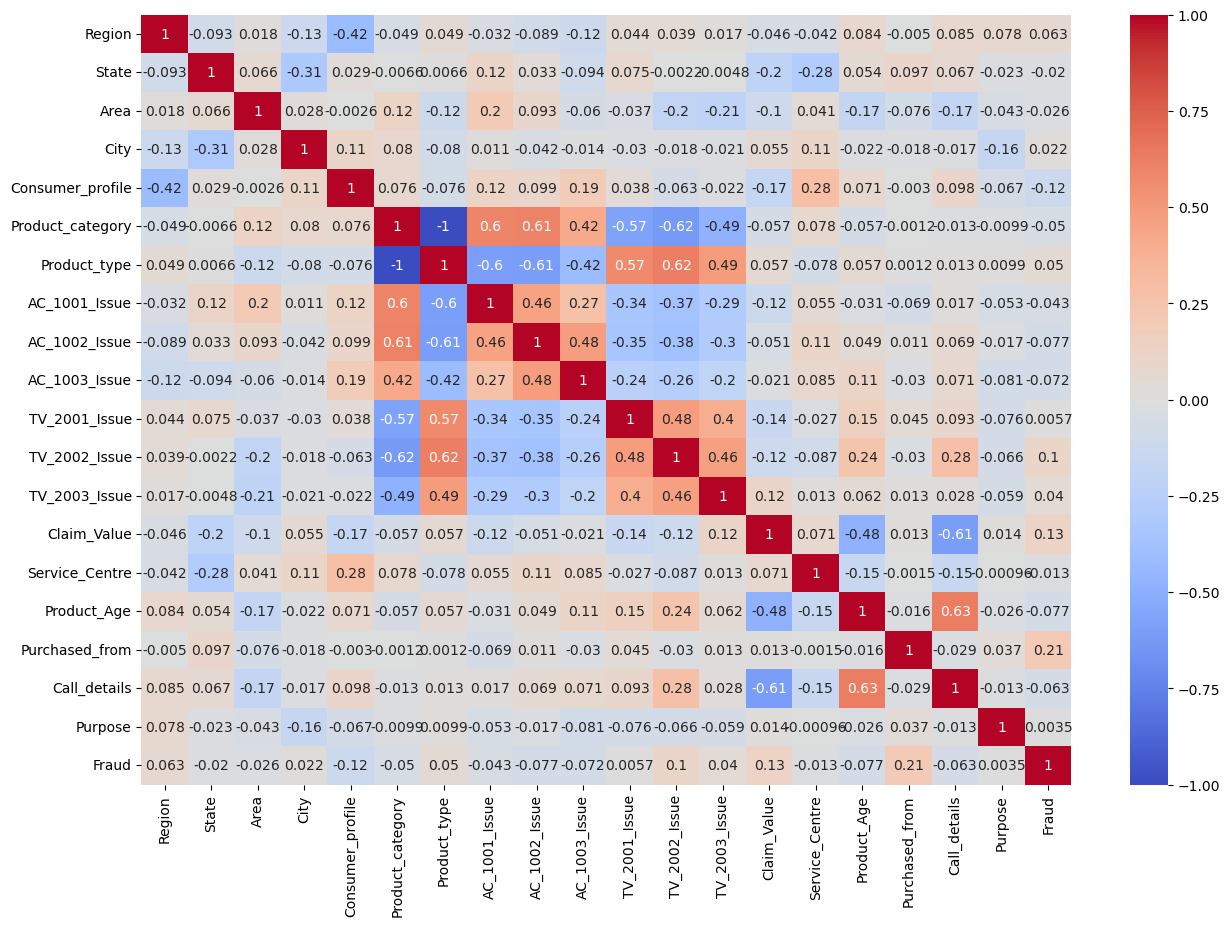

In [17]:
# Correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [18]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Fraud', axis=1), df['Fraud'], test_size=0.30, random_state=42)


In [19]:
# Decision Tree Classifier
dtree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 6, 8, 10],
    'min_samples_split': [2, 4, 6, 8, 10],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}
grid = GridSearchCV(dtree, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best parameters for Decision Tree Classifier: {grid.best_params_}")
dtree = DecisionTreeClassifier(**grid.best_params_)
dtree.fit(X_train, y_train)
print(f"Decision Tree training accuracy: {dtree.score(X_train, y_train)}")
d_pred = dtree.predict(X_test)


Fitting 5 folds for each of 500 candidates, totalling 2500 fits
Best parameters for Decision Tree Classifier: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Decision Tree training accuracy: 0.9184549356223176


In [20]:
# Random Forest Classifier
rfc = RandomForestClassifier()
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_leaf': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0, 42]
}
grid = GridSearchCV(rfc, param_grid, cv=5, verbose=1, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best parameters for Random Forest Classifier: {grid.best_params_}")
rfc = RandomForestClassifier(**grid.best_params_)
rfc.fit(X_train, y_train)
print(f"Random Forest training accuracy: {rfc.score(X_train, y_train)}")
r_pred = rfc.predict(X_test)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
Best parameters for Random Forest Classifier: {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 2, 'random_state': 0}
Random Forest training accuracy: 0.9184549356223176


In [21]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(f"Logistic Regression training accuracy: {lr.score(X_train, y_train)}")
l_pred = lr.predict(X_test)


Logistic Regression training accuracy: 0.9184549356223176


C:\Users\91807\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


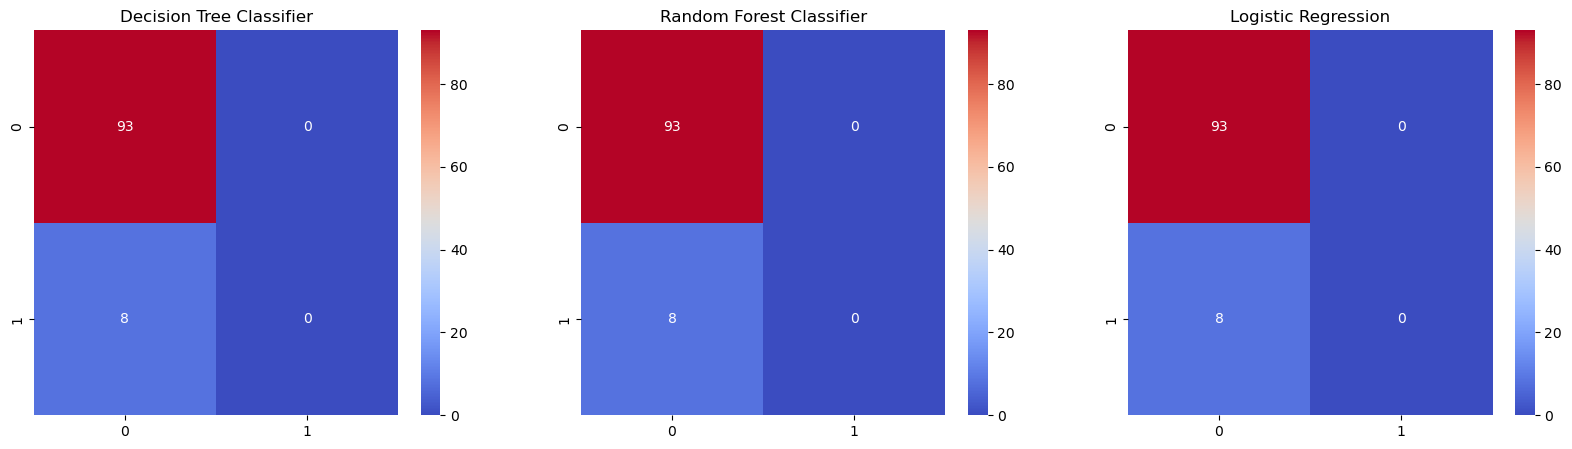

In [22]:
# Confusion matrices
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.heatmap(confusion_matrix(y_test, d_pred), annot=True, cmap='coolwarm', ax=ax[0]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, r_pred), annot=True, cmap='coolwarm', ax=ax[1]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, l_pred), annot=True, cmap='coolwarm', ax=ax[2]).set_title('Logistic Regression')
plt.show()

In [23]:
# Classification reports
print("Classification Report for Decision Tree Classifier:")
print(classification_report(y_test, d_pred))

print("Classification Report for Random Forest Classifier:")
print(classification_report(y_test, r_pred))

print("Classification Report for Logistic Regression:")
print(classification_report(y_test, l_pred))

Classification Report for Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101

Classification Report for Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                           0.92       101
   macro avg       0.46      0.50      0.48       101
weighted avg       0.85      0.92      0.88       101

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        93
           1       0.00      0.00      0.00         8

    accuracy                   

C:\Users\91807\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91807\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91807\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91807\anaconda3\Lib\site-packages\sklearn\metr

In [24]:
# Model performance metrics
print('==================== Decision Tree Classifier ====================')
print(f'Accuracy Score: {accuracy_score(y_test, d_pred)}')
print(f'R2 Score: {r2_score(y_test, d_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, d_pred)}')

print('==================== Random Forest Classifier ====================')
print(f'Accuracy Score: {accuracy_score(y_test, r_pred)}')
print(f'R2 Score: {r2_score(y_test, r_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, r_pred)}')

print('==================== Logistic Regression ====================')
print(f'Accuracy Score: {accuracy_score(y_test, l_pred)}')
print(f'R2 Score: {r2_score(y_test, l_pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, l_pred)}')


==================== Decision Tree Classifier ====================
Accuracy Score: 0.9207920792079208
R2 Score: -0.08602150537634379
Mean Squared Error: 0.07920792079207921
==================== Random Forest Classifier ====================
Accuracy Score: 0.9207920792079208
R2 Score: -0.08602150537634379
Mean Squared Error: 0.07920792079207921
==================== Logistic Regression ====================
Accuracy Score: 0.9207920792079208
R2 Score: -0.08602150537634379
Mean Squared Error: 0.07920792079207921
